In [1]:
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import pandas as pd
import tensorflow as tf
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import tensorflow as tf
import random
from datetime import datetime
import numpy as np
import os

In [2]:
DATASET_URL = "./abalone.data"
FEATURES = [
	"sex",
	"length",
	"diameter",
	"height",
	"whole_weight",
	"shucked_weight",
	"viscera_weight",
	"shell_weight"
]
LABEL = "rings"
COLUMNS = FEATURES + [LABEL]
DTYPE={
	"sex": "category",
	"length": "float32",
	"diameter": "float32",
	"height": "float32",
	"whole_weight": "float32",
	"shucked_weight": "float32",
	"viscera_weight": "float32",
	"shell_weight": "float32",
	"rings": "category"
}
TEST_SET_SIZE=0.2
SHUFFLE_SIZE=140
BATCH_SIZE=50
SEED=1
COLUMNS

['sex',
 'length',
 'diameter',
 'height',
 'whole_weight',
 'shucked_weight',
 'viscera_weight',
 'shell_weight',
 'rings']

In [3]:
tf.random.set_seed(SEED)
random.seed(SEED)


In [4]:
data = pd.read_csv(os.path.join(os.path.abspath(os.getcwd()), DATASET_URL), names=COLUMNS, dtype=DTYPE, index_col=False, skipinitialspace=True)
data.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   sex             4177 non-null   category
 1   length          4177 non-null   float32 
 2   diameter        4177 non-null   float32 
 3   height          4177 non-null   float32 
 4   whole_weight    4177 non-null   float32 
 5   shucked_weight  4177 non-null   float32 
 6   viscera_weight  4177 non-null   float32 
 7   shell_weight    4177 non-null   float32 
 8   rings           4177 non-null   category
dtypes: category(2), float32(7)
memory usage: 123.9 KB


In [6]:
# Missing values
data = data.dropna()
data.isna().sum()

sex               0
length            0
diameter          0
height            0
whole_weight      0
shucked_weight    0
viscera_weight    0
shell_weight      0
rings             0
dtype: int64

In [7]:
# Normalise Features
for feature in FEATURES:
    if data[feature].dtype == "float32":
        # min_max_scaler = preprocessing.MinMaxScaler()
        # data[[feature]] = min_max_scaler.fit_transform(data[[feature]])
        standard_scaler = preprocessing.StandardScaler()
        data[[feature]] = standard_scaler.fit_transform(data[[feature]])

data.describe()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight
count,4.177000e+03,4.177000e+03,4.177000e+03,4.177000e+03,4.177000e+03,4.177000e+03,4.177000e+03
mean,1.294710e-08,-3.071558e-09,1.152815e-08,1.315932e-08,-2.956411e-09,-4.432297e-09,-3.541651e-09
std,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00
min,-3.739154e+00,-3.556267e+00,-3.335953e+00,-1.686092e+00,-1.614731e+00,-1.643173e+00,-1.705135e+00
25%,-6.161976e-01,-5.833158e-01,-5.862074e-01,-7.897577e-01,-7.811585e-01,-7.946415e-01,-7.819095e-01
50%,1.749515e-01,1.725194e-01,1.156330e-02,-5.963770e-02,-1.052891e-01,-8.753198e-02,-3.470796e-02
75%,7.579032e-01,7.267984e-01,6.093342e-01,6.613050e-01,6.426728e-01,6.606354e-01,6.478319e-01
max,2.423480e+00,2.440025e+00,2.368329e+01,4.072271e+00,5.085388e+00,5.286500e+00,5.504642e+00


In [8]:
data = data.astype(dtype=DTYPE)
data.dtypes

sex               category
length             float32
diameter           float32
height             float32
whole_weight       float32
shucked_weight     float32
viscera_weight     float32
shell_weight       float32
rings             category
dtype: object

In [9]:
# Class Balance
data[LABEL].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
29      1
26      1
25      1
2       1
1       1
Name: rings, dtype: int64

In [10]:
# Label Encode
labelencoder = preprocessing.LabelEncoder()
data[LABEL] = labelencoder.fit_transform(data[LABEL])
data.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,6
1,M,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,25
2,F,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,27
3,M,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,1
4,I,-1.615543,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,25


In [11]:
data[LABEL].nunique()

28

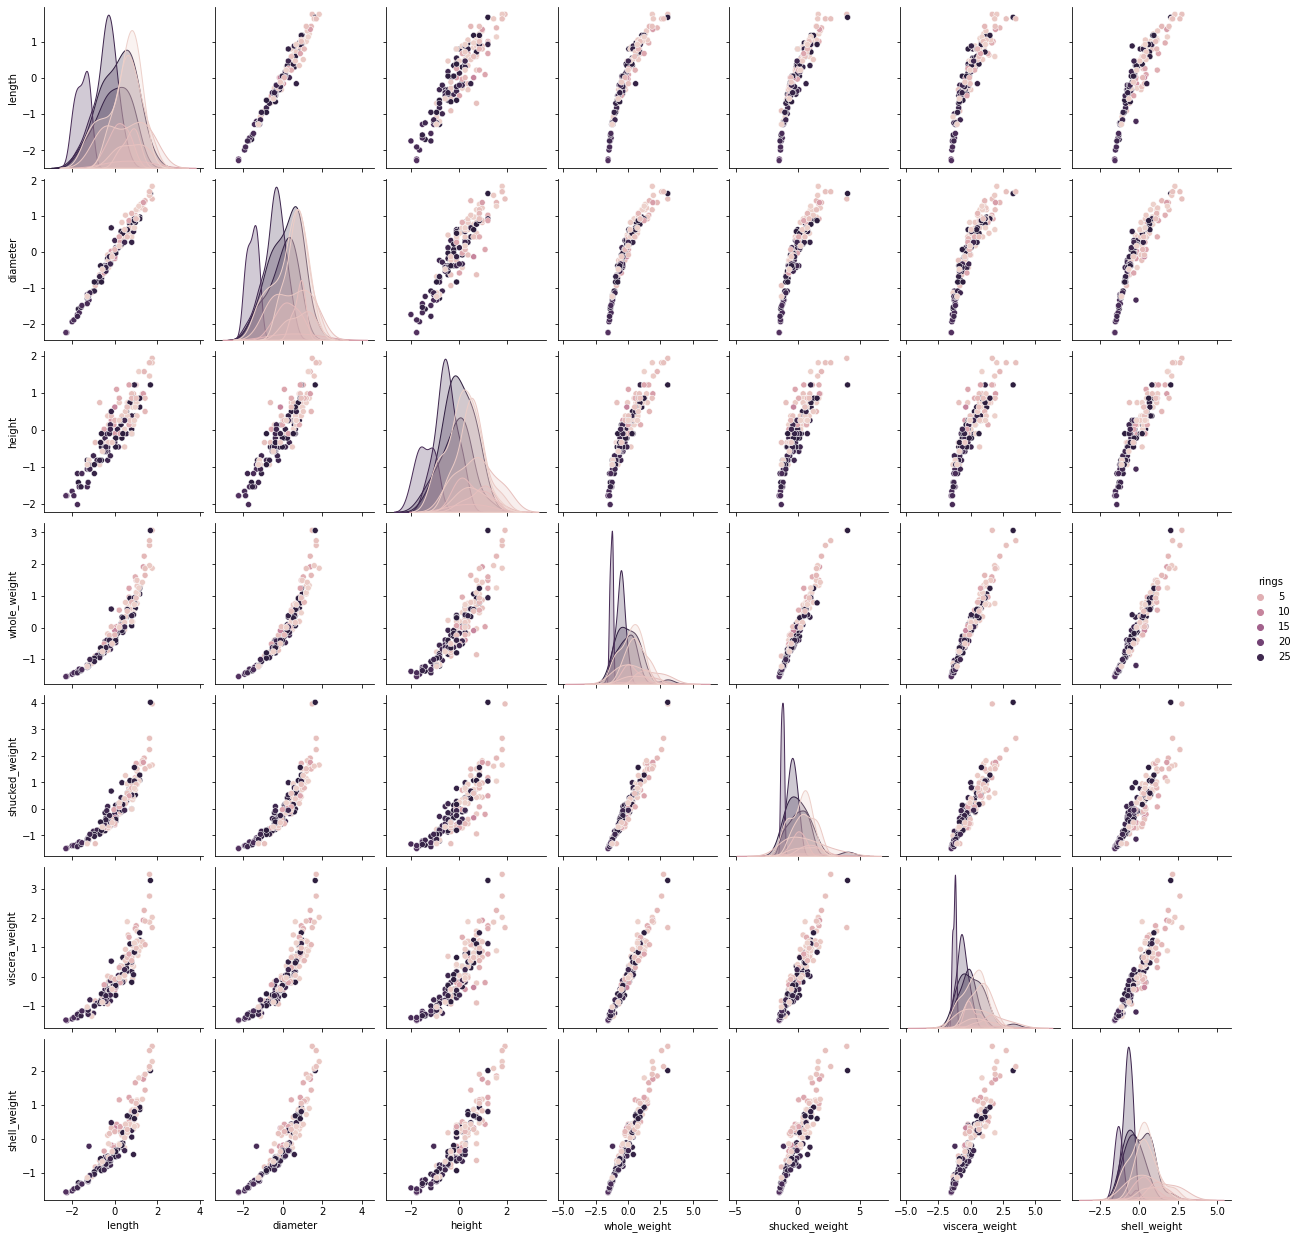

In [12]:
sns.pairplot(data.sample(n=150, random_state=1), hue=LABEL)

In [13]:
target = data.pop(LABEL)
target

0        6
1       25
2       27
3        1
4       25
        ..
4172     2
4173     1
4174    27
4175     1
4176     3
Name: rings, Length: 4177, dtype: int64

In [14]:
data = pd.get_dummies(data, dtype="float32")
data

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,sex_F,sex_I,sex_M
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,0,0,1
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,0,0,1
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,1,0,0
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,0,0,1
4,-1.615543,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,0,1,0
...,...,...,...,...,...,...,...,...,...,...
4172,0.341509,0.424464,0.609334,0.118814,0.047908,0.532899,0.073061,1,0,0
4173,0.549706,0.323686,-0.107991,0.279929,0.358808,0.309362,0.155685,0,0,1
4174,0.632985,0.676409,1.565767,0.708212,0.748559,0.975413,0.496955,0,0,1
4175,0.841182,0.777188,0.250672,0.541997,0.773341,0.733627,0.410739,1,0,0


In [15]:
train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=TEST_SET_SIZE)

# Set training dataset
train = tf.data.Dataset.from_tensor_slices(
		(train_x.values, train_y.values))

# Set testing dataset
test = tf.data.Dataset.from_tensor_slices(
		(test_x.values, test_y.values))
